In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train_data=pd.read_csv("C://Users//shrut//Downloads//archive (4)//training.csv", low_memory=False)
train_data.head()

,NO.,Brand,Sentiment,Text,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
Validation_data=pd.read_csv("C://Users//shrut//Downloads//archive (4)//twitter_validation.csv")
Validation_data.head()

,No.,Brand,Sentiment,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [13]:
#concatenating the datasate
combined_data = pd.concat([train_data, Validation_data])

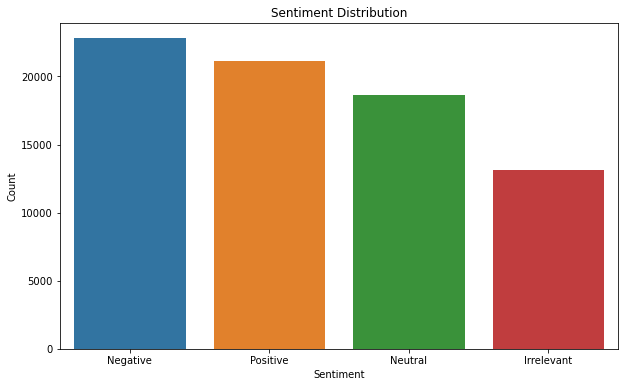

In [14]:
#Analyze sentiment patterns in the combined dataset
plt.figure(figsize=(10,6))
sns.countplot(x='Sentiment', data=combined_data, order=combined_data['Sentiment'].value_counts().index)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

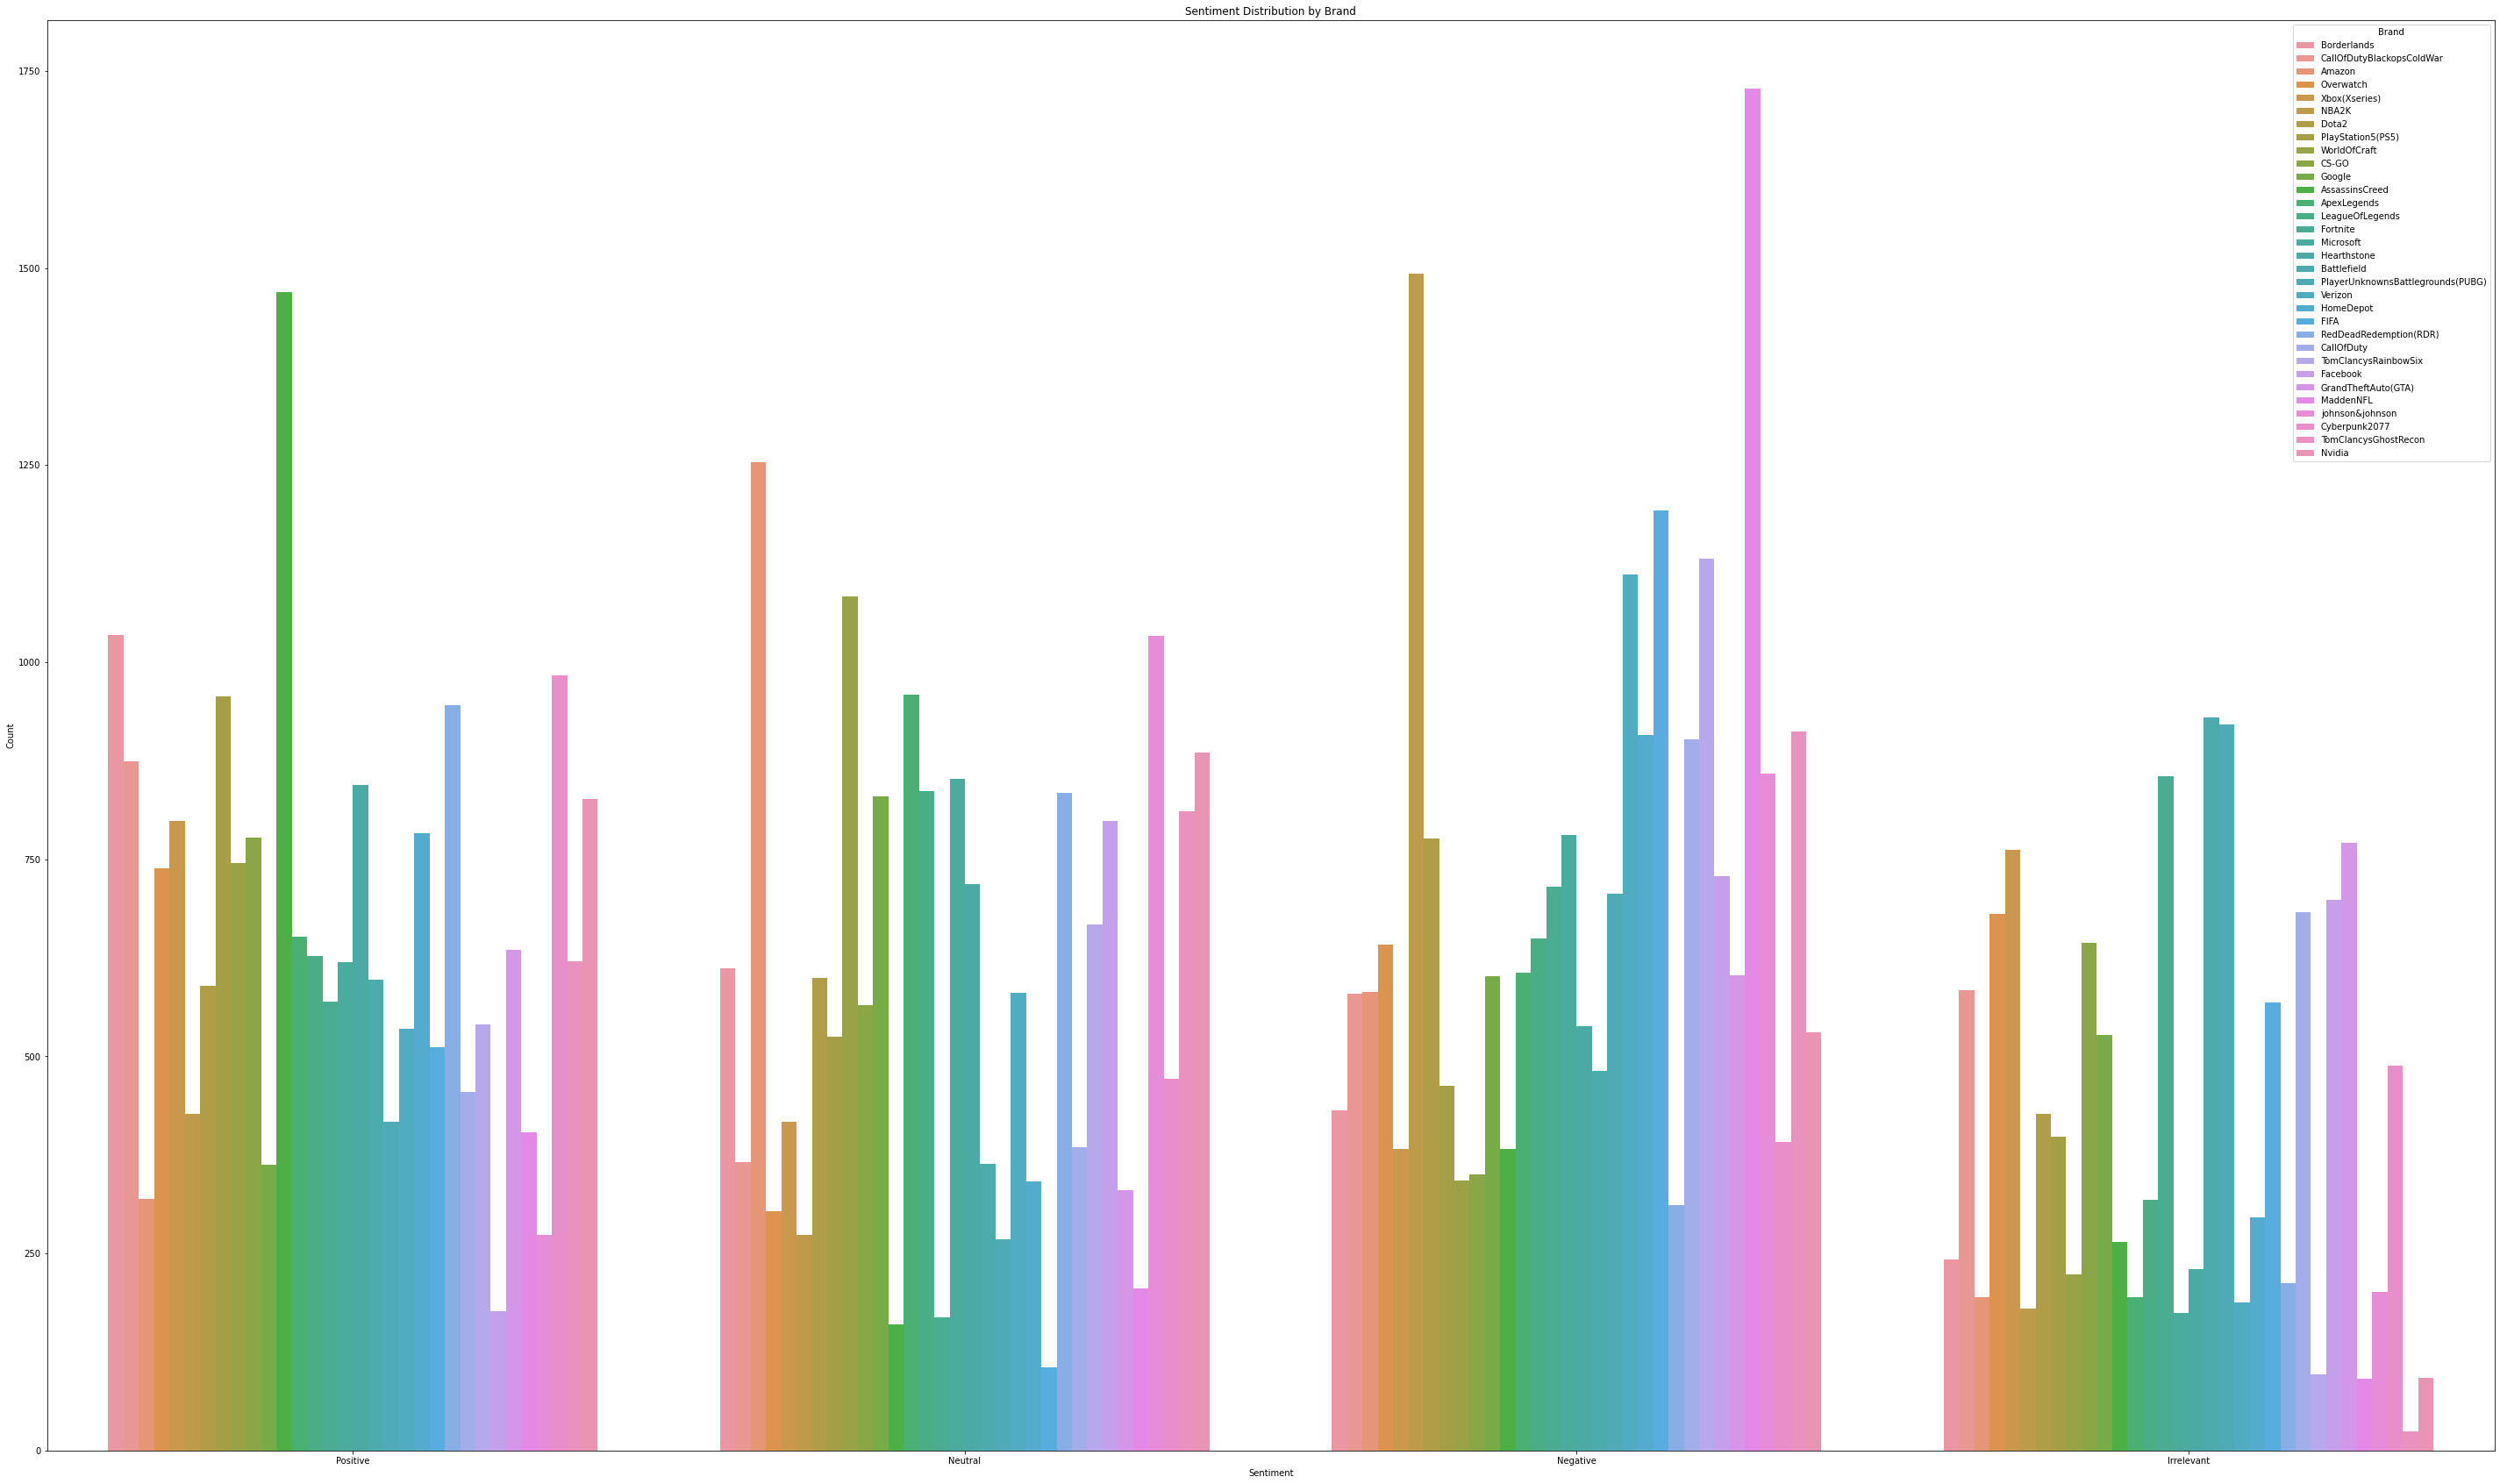

In [15]:
# Visualize sentiment distribution for each brand or topic
plt.figure(figsize=(50, 30))
sns.countplot(x='Sentiment', hue='Brand', data=combined_data)
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(title='Brand')
plt.show()

In [16]:
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [17]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
import nltk
nltk.download('punkt')  

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shrut\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
stop_words = set(stopwords.words('english'))

In [21]:
positive_comments = combined_data[combined_data['Sentiment'] == 'Positive']['Text']
positive_tokens = [word.lower() for comment in positive_comments if isinstance(comment, str) for word in word_tokenize(comment) if word.isalpha() and word.lower() not in stop_words]


In [24]:
negative_comments = combined_data[combined_data['Sentiment'] == 'Negative']['Text']
negative_tokens = [word.lower() for comment in negative_comments if isinstance(comment, str) for word in word_tokenize(comment) if word.isalpha() and word.lower() not in stop_words]


In [25]:
positive_freq_dist = FreqDist(positive_tokens)
negative_freq_dist = FreqDist(negative_tokens)

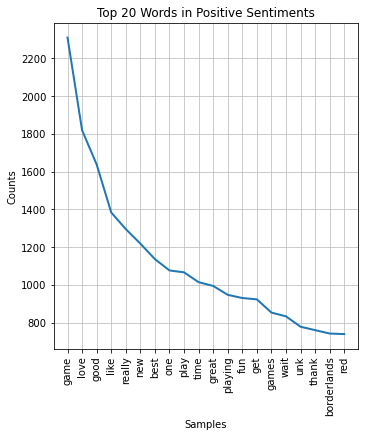

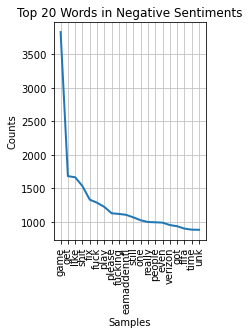

<Figure size 432x288 with 0 Axes>

In [26]:
# Plot bar charts
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
positive_freq_dist.plot(20, title='Top 20 Words in Positive Sentiments', cumulative=False)

plt.subplot(1, 2, 2)
negative_freq_dist.plot(20, title='Top 20 Words in Negative Sentiments', cumulative=False)

plt.tight_layout()
plt.show()
